In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Q1  Read the homes.csv data file
df = pd.read_csv('/Users/jaykishanpanjiyar/OIM_7502_classwork/data/homes.csv')

In [54]:
# print("--- First 5 Rows ---")
print(df.head())
print("\n--- Data Information (Columns, Non-Null Counts, Dtypes) ---")
df.info()
print("\n--- Descriptive Statistics ---")
print(df.describe())

#Data Cleaning: Handle the 'Sell' column
# The info() output reveals 'Sell' is an 'object' (string) type, indicating a non-numeric value exists.
# We attempt conversion, forcing errors to NaN, then drop the row(s) causing the issue.
df['Sell'] = pd.to_numeric(df['Sell'], errors='coerce')
df_cleaned = df.dropna()

print(f"\nOriginal Data Size: {len(df)}")
print(f"Cleaned Data Size: {len(df_cleaned)}")

  Sell   List  Living  Rooms  Beds  Baths   Age  Acres   Taxes
0  142  160.0    28.0   10.0   5.0    3.0  60.0   0.28  3167.0
1  175  180.0    18.0    8.0   4.0    1.0  12.0   0.43  4033.0
2  129  132.0    13.0    6.0   3.0    1.0  41.0   0.33  1471.0
3  138  140.0    17.0    7.0   3.0    1.0  22.0   0.46  3204.0
4  232  240.0    25.0    8.0   4.0    3.0   5.0   2.05  3613.0

--- Data Information (Columns, Non-Null Counts, Dtypes) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    51 non-null     object 
 1   List    50 non-null     float64
 2   Living  50 non-null     float64
 3   Rooms   50 non-null     float64
 4   Beds    50 non-null     float64
 5   Baths   50 non-null     float64
 6   Age     50 non-null     float64
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.7+ KB


In [55]:
# Q2. Add the code necessary to describe the dataset
print("\n--- Descriptive Statistics for Cleaned Data ---")
df_cleaned.describe()


--- Descriptive Statistics for Cleaned Data ---


,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


# Q3 . Markdown Commentary to Describe the Dataset

The dataset consists of **50 observations** (individual homes) and **9 variables** describing various characteristics related to the sale of the home.

The primary variables and their descriptive statistics are summarized below:

| Variable | Description | Units | Observation from Statistics |
| :--- | :--- | :--- | :--- |
| **Sell** | The price the home ultimately sold for. | $\text{\$1000s}$ | The average selling price is approximately **\$170.36 K**, with a wide range (Min: \$87k, Max: \$567k), indicating significant variation in home values. |
| **List** | The initial asking price for the home. | $\text{\$1000s}$ | The mean list price (\$178.34 k) is slightly higher than the mean sell price, suggesting homes generally sell for slightly less than the initial asking price. |
| **Living** | The size of the living area. | $\text{100 sq ft}$ | Living area averages $2,100 \text{ sq ft}$ (Mean: 21.0), ranging from $1,000 \text{ sq ft}$ to $6400 \text{ sq ft}$. This is a good continuous variable for predicting price. |
| **Rooms, Beds, Baths** | Structural attributes of the home. | $\text{Count}$ | On average, homes have **8 rooms**, **4 bedrooms**, and **1.86 bathrooms**. |
| **Age** | The age of the home since construction. | $\text{Years}$ | The sample includes a wide variety of ages, from as new as **2 years** to as old as **202 years**, averaging about 30 years. |
| **Taxes** | The annual property tax amount. | $\$$ | Taxes range from a minimum of **\$1,445** to a maximum of **\$12,192**, with an average of about **\$3,706**. |

In summary, the dataset is composed of house characteristics that exhibit **high variability** in key variables like `Sell Price`, `List Price`, and `Taxes`, making it suitable for exploring linear relationships.


# Q4.   EDA Technique 1: Distribution of Selling Price (Histogram)
## Markdown Commentary: What, Why, and Results

I am generating a histogram of the Sell price, overlaid with a Kernel Density Estimate (KDE). This is a fundamental technique to assess the shape, spread, and central tendency of the target variable. The KDE helps visualize the underlying probability distribution. The analysis reveals the distribution is slightly right-skewed, meaning most homes cluster at lower prices, with a few expensive outliers pulling the average higher.



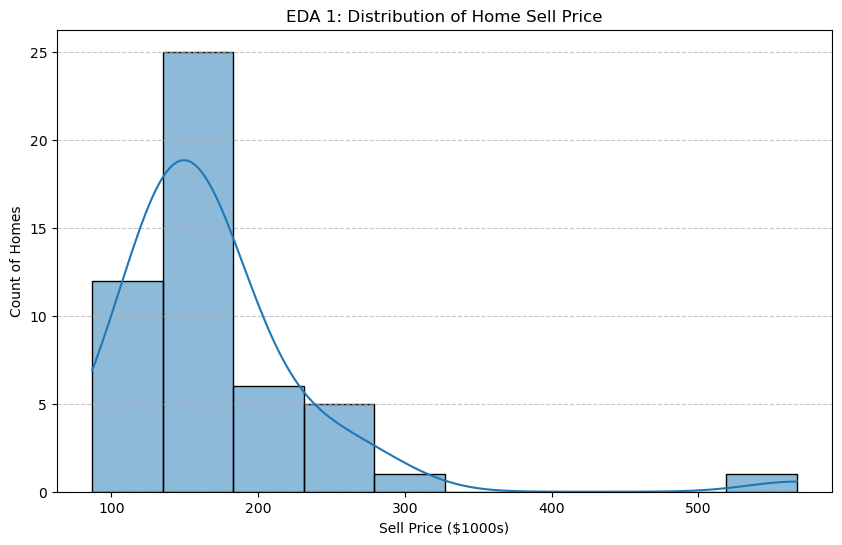

In [56]:
#Q4  EDA Technique 1: Distribution of Selling Price (Histogram)

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Sell'], kde=True, bins=10)
plt.title('EDA 1: Distribution of Home Sell Price')
plt.xlabel('Sell Price ($1000s)')
plt.ylabel('Count of Homes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# EDA Technique 2: Relationship between Living Area and Sell Price (Scatter Plot)
I am creating a scatter plot of Sell price vs. Living area, including a line of best fit using seaborn.regplot. This is the best technique for bivariate analysis between two continuous variables. The plot visually confirms the strength and direction of the relationship, which is critical before modeling. The plot shows a strong, positive linear relationship. This suggests that Living area will be a highly effective predictor in a linear model.

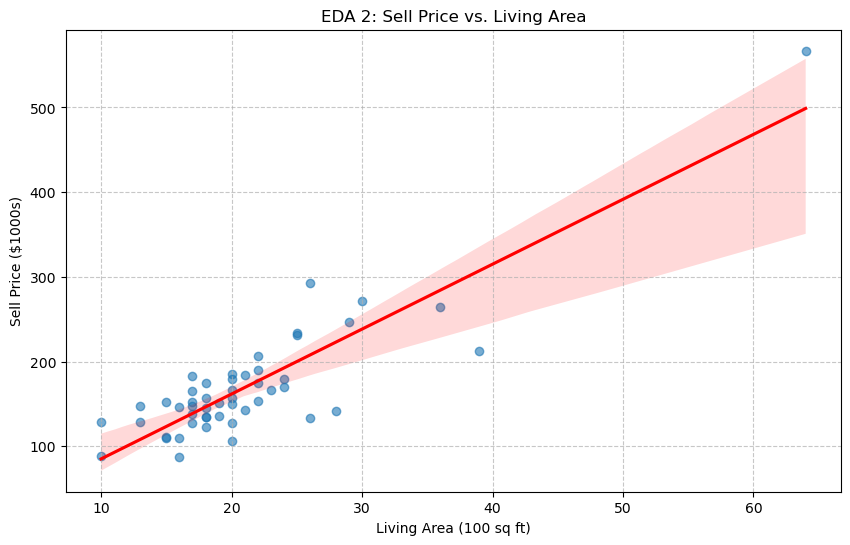

In [57]:
# EDA Technique 2: Relationship between Living Area and Sell Price (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.regplot(x='Living', y='Sell', data=df_cleaned, 
            scatter_kws={'alpha':0.6},
            line_kws={'color':'red'}) 
plt.title('EDA 2: Sell Price vs. Living Area')
plt.xlabel('Living Area (100 sq ft)')
plt.ylabel('Sell Price ($1000s)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# EDA Technique 3: Correlation Heatmap

Markdown Commentary: What, Why, and Results

I am computing and visualizing the correlation matrix using a heatmap. This technique quickly identifies the linear relationship (strength and direction) between all pairs of variables. It helps select good predictors and diagnose potential issues like multicollinearity (when independent variables are highly correlated with each other). The heatmap shows that List (1), Living (0.88), and Taxes (0.90) have the strongest positive correlation with Sell price. It also highlights the strong correlation between Living and structural variables like Rooms (0.75), suggesting these variables contain redundant information if used together in a multiple regression model

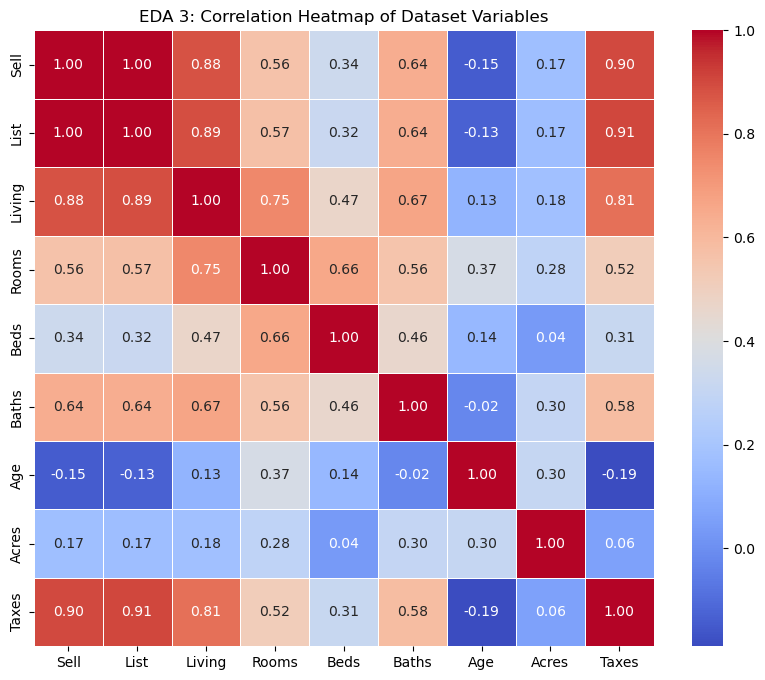

In [58]:
# EDA Technique 3: Correlation Heatmap
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('EDA 3: Correlation Heatmap of Dataset Variables')
plt.show()

In [59]:
# Q5 Linear Regression Model 1: Taxes as Predictor

# Define the dependent variable (Y) and independent variable (X)
Y = df_cleaned['Sell']
X1 = df_cleaned['Taxes']

# Add a constant term for the intercept (b0)
X1 = sm.add_constant(X1)

# Fit the OLS model
model_taxes = sm.OLS(Y, X1).fit()

# Display the model output
print("--- Linear Regression Model: Sell vs. Taxes ---")
print(model_taxes.summary())

--- Linear Regression Model: Sell vs. Taxes ---
                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           7.22e-19
Time:                        16:34:15   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

# Q6. Markdown Commentary on Model 1 Output

## Is Taxes a good predictor for selling price? Why or why not?

Yes, Taxes is a good, statistically significant predictor for selling price.

R-squared (0.809): This means that 80.9% of the variation in the home's selling price (Sell) can be explained by the variation in annual property taxes (Taxes). This is a moderately high value for a simple linear model.

P-value (P>∣t∣=0.000): The p-value for the Taxes coefficient is essentially zero, which is well below the standard significance level of 0.05. This strongly suggests that the relationship is not due to random chance and Taxes has a significant linear effect on Sell price.

Coefficient (coef=0.0414): For every thousand dollar increase in property taxes, the model predicts an increase in the selling price of $41.4 (since Sell is in 1000s, the coefficient is interpreted as 0.0414×1000 dollars)

In [60]:
# Q7 Linear Regression Model 2: Living Area as Predictor
# Define the new independent variable (X)
X2 = df_cleaned['Living']

# Add a constant term for the intercept (b0)
X2 = sm.add_constant(X2)

# Fit the OLS model
model_living = sm.OLS(Y, X2).fit()

# Display the model output
print("--- Linear Regression Model: Sell vs. Living Area ---")
print(model_living.summary())

--- Linear Regression Model: Sell vs. Living Area ---
                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           4.39e-17
Time:                        16:34:16   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

# Q7. Which Model is Better?

### Markdown Commentary on Model Comparison and Limitations

#### Which model is "better"?

To compare the two Simple Linear Regression models, we look at the **Adjusted R-squared ($\mathbf{R^2_{adj}}$)** value, which indicates the explanatory power of the model.

| Model | Independent Variable | R-squared | **Adj. R-squared** |
| :--- | :--- | :--- | :--- |
| **Model 1** | `Taxes` | 0.809 | **0.805** |
| **Model 2** | `Living` Area | 0.773 | 0.769 |

**Conclusion: Model 1 (`Sell` vs. `Taxes`) is the better model.**

* Model 1 has a higher Adjusted R-squared ($\mathbf{0.805}$) compared to Model 2 ($\mathbf{0.769}$).
* This means that the variation in **annual property taxes (`Taxes`) explains a larger percentage of the variation** in the selling price than the living area size (`Living`). Both variables, however, are highly statistically significant predictors (P-value of 0.000 for both).

#### What are some limitations of the model?

Both Model 1 and Model 2 are examples of **Simple Linear Regression** models, which suffer from shared limitations when predicting a complex outcome like a home price:

1.  **Omitted Variable Bias:** The most critical limitation is the use of only **one predictor**. A home's price is influenced by many factors simultaneously (e.g., age, number of bedrooms, location). By excluding these, the models are **under-specified**, and the error term is large, limiting their accuracy.
2.  **Assumption of Linearity:** The models assume the relationship is perfectly linear. While this is a good first approximation, the true relationship between real-world variables may be slightly non-linear, especially at the extreme ends of the data.
3.  **Irreducible Error:** Even a theoretically "perfect" model can't account for all random factors (like specific market fluctuations, timing of the sale, or buyer emotions). This remaining error is **irreducible** and represents a fundamental limitation in prediction.
